# Business Case Study: Yulu - Hypothesis Testing
### By Swapnil Rajput

### Problem Statement
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Yulu has recently suffered considerable dips in its revenues. 
#### The company wants to understand:
 1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
 2. How well those variables describe the electric cycle demands

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, geom, ttest_1samp, ttest_ind, chi2_contingency, f_oneway, shapiro, levene
import statsmodels.api as sm

In [2]:
df = pd.read_csv("original_bike_sharing.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## EDA

In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [16]:
# Correcting data type of columns in order to better understand and analyse 

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['season'] = df['season'].astype("str")
df['holiday'] = df['holiday'].astype("str")
df['workingday'] = df['workingday'].astype("str")
df['workingday'] = df['workingday'].astype("str")
df['weather'] = df['weather'].astype("str")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


##### Categorical columns - 
1. datetime
2. season
3. holiday
4. workingday  
5. weather     

##### Numerical columns - 
1. temp        
2. atemp       
3. humidity    
4. windspeed      
5. casual      
6. registered  
7. count (casual + registered)

In [9]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### There are no missing values

In [79]:
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [81]:
# No duplicate values for any date and time

In [14]:
df.describe(include = "all")

<ipython-input-14-05881adaf55a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = "all")


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-07-04 14:00:00,4,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734,10575,7412,7192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [214]:
df["datetime"].dt.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [225]:
df["datetime"].dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [ ]:
# Total number of rows 10886 which represents data ranging between 01/01/2011 to 19/12/2012 on hourly basis.
# data is not available for 20th onwards till the month end for all the months
# Data has information regarding season, holiday, workingday, temperature, humidity, windspeed and total number of casual & registered users who availed service
# season column has 4 unique categories
# holiday column has 2 unique categories
# workingday column has 2 unique categories
# weather column has 4 unique categories

In [18]:
df.describe(include=[np.number])

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [39]:
df[df["casual"] == df["casual"].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6729,2012-03-17 16:00:00,1,0,0,1,26.24,31.06,50,0.0,367,318,685


In [41]:
df[df["registered"] == df["registered"].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977


In [42]:
df[df["count"] == df["count"].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977


In [21]:
df[df["casual"] == df["casual"].min()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
29,2011-01-02 06:00:00,1,0,0,3,17.22,21.210,77,19.9995,0,2,2
30,2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1,1
31,2011-01-02 08:00:00,1,0,0,3,16.40,20.455,71,15.0013,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10838,2012-12-18 00:00:00,4,0,1,2,18.04,21.970,94,8.9981,0,18,18
10839,2012-12-18 01:00:00,4,0,1,2,18.04,21.970,94,8.9981,0,15,15
10841,2012-12-18 03:00:00,4,0,1,1,17.22,21.210,88,12.9980,0,5,5
10843,2012-12-18 05:00:00,4,0,1,1,15.58,19.695,87,6.0032,0,36,36


In [24]:
df[df["registered"] == df["registered"].min()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
210,2011-01-10 01:00:00,1,0,1,1,4.92,6.060,50,19.0012,1,0,1
456,2011-02-02 02:00:00,1,0,1,3,9.02,11.365,93,8.9981,4,0,4
905,2011-03-02 04:00:00,1,0,1,1,8.20,10.605,75,8.9981,1,0,1
953,2011-03-04 04:00:00,1,0,1,2,7.38,9.090,74,12.9980,1,0,1
1023,2011-03-07 04:00:00,1,0,1,1,8.20,7.575,80,35.0008,1,0,1
1045,2011-03-08 02:00:00,1,0,1,1,9.84,12.120,52,8.9981,1,0,1
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3
1375,2011-04-03 04:00:00,2,0,0,1,11.48,15.150,70,6.0032,3,0,3
1398,2011-04-04 03:00:00,2,0,1,1,15.58,19.695,66,19.0012,1,0,1


In [27]:
df[df["count"] == df["count"].min()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
30,2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1,1
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
71,2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6884,2012-04-05 04:00:00,2,0,1,1,15.58,19.695,43,19.0012,0,1,1
7051,2012-04-12 04:00:00,2,0,1,1,12.30,14.395,61,15.0013,0,1,1
7433,2012-05-09 02:00:00,2,0,1,3,22.96,26.515,88,30.0026,0,1,1
10288,2012-11-14 02:00:00,4,0,1,1,9.84,10.605,60,19.9995,0,1,1


In [37]:
for column in df.columns:
    if df[column].dtype == "O":
        print(df[column].value_counts())

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
0    10575
1      311
Name: holiday, dtype: int64
1    7412
0    3474
Name: workingday, dtype: int64
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


In [47]:
df[df["casual"] > df["registered"]]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14
28,2011-01-02 04:00:00,1,0,0,2,18.86,22.725,94,12.9980,2,1,3
210,2011-01-10 01:00:00,1,0,1,1,4.92,6.060,50,19.0012,1,0,1
351,2011-01-16 03:00:00,1,0,0,1,9.02,13.635,69,0.0000,9,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
9136,2012-09-04 01:00:00,3,0,1,1,27.88,31.820,82,8.9981,15,9,24
9281,2012-09-10 02:00:00,3,0,1,1,22.14,25.760,60,23.9994,11,6,17
9881,2012-10-16 02:00:00,4,0,1,1,18.04,21.970,67,8.9981,2,1,3
10264,2012-11-13 02:00:00,4,0,1,3,14.76,15.910,87,30.0026,7,4,11


### Statistical tests

### Difference between casual users count and registered user count

In [336]:
# Levene's test
# Ho :  The variances are equal across causal & registered users count hourly count.
# Ho :  The variances are not equal across causal & registered users count hourly count.
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [337]:
statistic, p_value = levene(df["casual"], df["registered"])

In [338]:
p_value

0.0

In [339]:
if p_value < 0.05:
    print("The variances are not equal across causal & registered users count hourly count.")
else:
    print("The variances are equal across causal & registered users count hourly count.")

The variances are not equal across causal & registered users count hourly count.


In [55]:
# t-test
# Ho :  There is no difference in the means of casual & registered users count
# Ho :  There is a difference in the means of casual & registered users count
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [63]:
t_statistic, p_value = ttest_ind(df["casual"], df["registered"])

In [64]:
t_statistic

-78.392728930192

In [65]:
p_value

0.0

In [67]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, there is a significant difference among the casual & registered users count.")
else:
    print("Failed to reject the null hypothesis, there is no difference among the casual & registered users count.")

Rejecting the null hypothesis, there is a significant difference among the casual & registered users count.


In [68]:
# Since there is a significant difference, we need to see the impact of other independent variables on these two groups

### impact of Season on casual users count, impact of Season on registered user count

In [89]:
#season (1: spring, 2: summer, 3: fall, 4: winter)

In [91]:
spring = df[df["season"] == "1"]
spring.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [94]:
summer = df[df["season"] == "2"]
summer.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1323,2011-04-01 00:00:00,2,0,1,3,10.66,12.880,100,11.0014,0,6,6
1324,2011-04-01 01:00:00,2,0,1,3,10.66,12.880,100,11.0014,0,4,4
1325,2011-04-01 02:00:00,2,0,1,3,10.66,12.880,93,12.9980,0,7,7
1326,2011-04-01 03:00:00,2,0,1,2,9.84,11.365,93,16.9979,0,4,4
1327,2011-04-01 04:00:00,2,0,1,2,9.84,11.365,93,16.9979,0,3,3


In [95]:
fall = df[df["season"] == "3"]
fall.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2690,2011-07-01 00:00:00,3,0,1,1,27.06,31.060,50,0.0,20,48,68
2691,2011-07-01 01:00:00,3,0,1,1,27.06,31.060,50,0.0,15,16,31
2692,2011-07-01 02:00:00,3,0,1,1,25.42,30.305,69,0.0,6,7,13
2693,2011-07-01 03:00:00,3,0,1,1,26.24,31.060,53,0.0,5,6,11
2694,2011-07-01 04:00:00,3,0,1,1,25.42,31.060,57,0.0,1,5,6


In [96]:
winter = df[df["season"] == "4"]
winter.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4055,2011-10-01 00:00:00,4,0,0,1,20.50,24.240,63,26.0027,24,106,130
4056,2011-10-01 01:00:00,4,0,0,1,19.68,23.485,67,22.0028,11,47,58
4057,2011-10-01 02:00:00,4,0,0,1,18.86,22.725,63,27.9993,21,46,67
4058,2011-10-01 03:00:00,4,0,0,1,18.86,22.725,59,27.9993,8,17,25
4059,2011-10-01 04:00:00,4,0,0,1,18.04,21.970,58,27.9993,2,6,8


In [130]:
# ANOVA
# Ho :  mean casual users count are equal for different seasons
# Ho :  Not all the means of casual users count are equal for different seasons
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [131]:
test_statistic, p_value = f_oneway(spring["casual"], summer["casual"], fall["casual"], winter["casual"])

In [132]:
p_value

7.937798855774506e-214

In [133]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, means of casual users count are not equal for different seasons.")
else:
    print("Failed to reject the null hypothesis, the means of casual users count are equal for different seasons.")

Rejecting the null hypothesis, means of casual users count are not equal for different seasons.


In [134]:
### There is a seasonal impact on the casual users count

In [136]:
# ANOVA
# Ho :  mean registered users count are equal for different seasons
# Ho :  Not all the means of registered users count are equal for different seasons
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [138]:
test_statistic, p_value = f_oneway(spring["registered"], summer["registered"], fall["registered"], winter["registered"])

In [139]:
p_value

1.8882994650328087e-106

In [140]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, means of registered users count are not equal for different seasons.")
else:
    print("Failed to reject the null hypothesis, the means of registered users count are equal for different seasons.")

Rejecting the null hypothesis, means of registered users count are not equal for different seasons.


In [119]:
### There is a seasonal impact on the registered users count

### impact of holiday on casual users count, impact of Season on registered user count

In [128]:
no_holiday = df[df["holiday"] == "0"]
no_holiday.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [129]:
yes_holiday = df[df["holiday"] == "1"]
yes_holiday.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
372,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,1,16,17
373,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,15,16
374,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,0,8,8
375,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,0,2,2
376,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,1,2,3


In [142]:
# ANOVA
# Ho :  mean casual users count are equal and doesn't get affected by holiday status
# Ho :  Not all the means of casual users count are equal and get affected by holiday status
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [143]:
test_statistic, p_value = f_oneway(no_holiday["casual"], yes_holiday["casual"])

In [144]:
p_value

4.843060024116768e-06

In [145]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, Not all the means of casual users count are equal and gets affected by holiday status.")
else:
    print("Failed to reject the null hypothesis, mean casual users count are equal and doesn't get affected by holiday status.")

Rejecting the null hypothesis, Not all the means of casual users count are equal and gets affected by holiday status.


In [ ]:
### There is a holiday impact on the casual users count

In [146]:
# ANOVA
# Ho :  mean registered users count are equal and doesn't get affected by holiday status
# Ho :  Not all the means of registered users count are equal and get affected by holiday status
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [147]:
test_statistic, p_value = f_oneway(no_holiday["registered"], yes_holiday["registered"])

In [148]:
p_value

0.028784891923729725

In [149]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, Not all the means of registered users count are equal and gets affected by holiday status.")
else:
    print("Failed to reject the null hypothesis, mean registered users count are equal and doesn't get affected by holiday status.")

Rejecting the null hypothesis, Not all the means of registered users count are equal and gets affected by holiday status.


In [150]:
### There is a holiday impact on the registered users count

### Impact of time of the day on registered and casual users

In [153]:
df["day_time"] = df["datetime"].dt.hour.apply(lambda x : "morning" if 6 <= x < 12 
                                              else "afternoon" if  12 <= x < 18 
                                              else "evening" if 18 <= x < 24 
                                              else "night")


<AxesSubplot:xlabel='day_time', ylabel='count'>

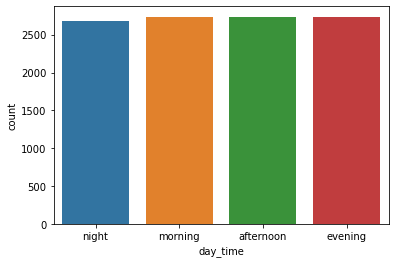

In [154]:
sns.countplot(x= df["day_time"])

In [155]:
morning = df[df["day_time"] == "morning"]
morning.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_time
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,morning
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,morning
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,morning
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,morning
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,morning


In [156]:
afternoon = df[df["day_time"] == "afternoon"]
afternoon.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_time
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,afternoon
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,afternoon
14,2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106,afternoon
15,2011-01-01 15:00:00,1,0,0,2,18.04,21.970,77,19.9995,40,70,110,afternoon
16,2011-01-01 16:00:00,1,0,0,2,17.22,21.210,82,19.9995,41,52,93,afternoon


In [157]:
evening = df[df["day_time"] == "evening"]
evening.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_time
18,2011-01-01 18:00:00,1,0,0,3,17.22,21.210,88,16.9979,9,26,35,evening
19,2011-01-01 19:00:00,1,0,0,3,17.22,21.210,88,16.9979,6,31,37,evening
20,2011-01-01 20:00:00,1,0,0,2,16.40,20.455,87,16.9979,11,25,36,evening
21,2011-01-01 21:00:00,1,0,0,2,16.40,20.455,87,12.9980,3,31,34,evening
22,2011-01-01 22:00:00,1,0,0,2,16.40,20.455,94,15.0013,11,17,28,evening


In [158]:
night = df[df["day_time"] == "night"]
night.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,night
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,night


In [159]:
# ANOVA
# Ho :  mean casual users count are equal and doesn't get affected by time of the day
# Ho :  Not all the means of casual users count are equal and get affected by time of the day
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [160]:
test_statistic, p_value = f_oneway(morning["casual"], afternoon["casual"], evening["casual"], night["casual"])

In [161]:
p_value

0.0

In [162]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, Not all the means of casual users count are equal and gets affected by time of the day.")
else:
    print("Failed to reject the null hypothesis, mean casual users count are equal and doesn't get affected by time of the day.")

Rejecting the null hypothesis, Not all the means of casual users count are equal and gets affected by time of the day.


In [163]:
# ANOVA
# Ho :  mean registered users count are equal and doesn't get affected by time of the day
# Ho :  Not all the means of registered users count are equal and get affected by time of the day
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [164]:
test_statistic, p_value = f_oneway(morning["registered"], afternoon["registered"], evening["registered"], night["registered"])

In [165]:
p_value

0.0

In [166]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, Not all the means of registered users count are equal and gets affected by time of the day.")
else:
    print("Failed to reject the null hypothesis, mean registered users count are equal and doesn't get affected by time of the day.")

Rejecting the null hypothesis, Not all the means of registered users count are equal and gets affected by time of the day.


### Impact of working day on registered and casual users

In [173]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [174]:
no_workingday = df[df["workingday"] == "0"]
no_workingday.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,night
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,night


In [175]:
yes_workingday = df[df["workingday"] == "1"]
yes_workingday.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_time
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,night
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,night
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,night
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,night
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,morning


In [176]:
# ANOVA
# Ho :  mean casual users count are equal and doesn't get affected by workingday status
# Ho :  Not all the means of casual users count are equal and get affected by workingday status
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [178]:
test_statistic, p_value = f_oneway(no_workingday["casual"], yes_workingday["casual"])

In [179]:
p_value

3.5619674236214164e-256

In [180]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, Not all the means of casual users count are equal and gets affected by workingday status.")
else:
    print("Failed to reject the null hypothesis, mean casual users count are equal and doesn't get affected by workingday status.")

Rejecting the null hypothesis, Not all the means of casual users count are equal and gets affected by workingday status.


In [185]:
### There is a workingday impact on the casual users count

In [177]:
# ANOVA
# Ho :  mean registered users count are equal and doesn't get affected by workingday status
# Ho :  Not all the means of registered users count are equal and get affected by workingday status
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [181]:
test_statistic, p_value = f_oneway(no_workingday["registered"], yes_workingday["registered"])

In [182]:
p_value

6.806493719944895e-36

In [183]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, Not all the means of registered users count are equal and gets affected by workingday status.")
else:
    print("Failed to reject the null hypothesis, mean registered users count are equal and doesn't get affected by workingday status.")

Rejecting the null hypothesis, Not all the means of registered users count are equal and gets affected by workingday status.


In [184]:
### There is a workingday impact on the registered users count

### Weather and season association

In [308]:
# Chisquare
# H0: Weather and season are not associated
# Ha: Weather and season are associated
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [309]:
observed = pd.crosstab(index = df["season"], columns = df["weather"])
observed

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [310]:
test_statistic, p_value, dof, expected_values = chi2_contingency(observed)

In [311]:
p_value

1.549925073686492e-07

In [312]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, Weather and season are associated.")
else:
    print("Failed to reject the null hypothesis, mWeather and season are not associated.")

Rejecting the null hypothesis, Weather and season are associated.


In [313]:
# Weather is dependent on season

### Weather and time association

In [203]:
# Chisquare
# H0: Weather and time state are not associated
# Ha: Weather and time are associated
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [199]:
observed = pd.crosstab(index = df["weather"], columns = df["day_time"])
observed

day_time,afternoon,evening,morning,night
weather,,,,
1,1825,1908,1687,1772
2,690,598,831,715
3,221,229,212,197
4,0,1,0,0


In [200]:
test_statistic, p_value, dof, expected_values = chi2_contingency(observed)

In [202]:
p_value

3.197028675823229e-09

In [204]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, Weather and time state are associated.")
else:
    print("Failed to reject the null hypothesis, mWeather and time state are not associated.")

Rejecting the null hypothesis, Weather and time state are associated.


In [356]:
night = df[df["day_time"] == "night"]["count"]
morning = df[df["day_time"] == "morning"]["count"]
afternoon = df[df["day_time"] == "afternoon"]["count"]
evening = df[df["day_time"] == "evening"]["count"]

In [357]:
# ANOVA
# Ho :  mean users count are equal and doesn't get affected by time of the day
# Ho :  Not all the means of users count are equal and gets affected by time of the day
# Confidence level = 95% = 0.95
# Significance level = 1 - Confidence level  = 5%

In [358]:
test_statistic, p_value = f_oneway(night, morning, afternoon, evening)
p_value

0.0

In [359]:
if p_value < 0.05:
    print("Rejecting the null hypothesis, Not all the means of users count are equal and gets affected by time of the day.")
else:
    print("Failed to reject the null hypothesis, mean users count are equal and doesn't get affected by time of the day.")

Rejecting the null hypothesis, Not all the means of users count are equal and gets affected by time of the day.


### Visual Analysis:

In [243]:
df.groupby("season").agg({"casual":["count", "sum", "mean"]})

casual                   
        count     sum       mean
season                          
1        2686   41605  15.489576
2        2733  129672  47.446762
3        2733  142718  52.220271
4        2734   78140  28.580834

<AxesSubplot:xlabel='season', ylabel='casual'>

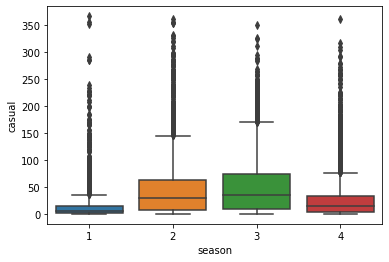

In [285]:
sns.boxplot(x = "season", y = "casual", data = df)

In [244]:
df.groupby("season").agg({"registered":["count", "sum", "mean"]})

registered                    
            count     sum        mean
season                               
1            2686  270893  100.853686
2            2733  458610  167.804610
3            2733  497944  182.196853
4            2734  465894  170.407462

<AxesSubplot:xlabel='season', ylabel='registered'>

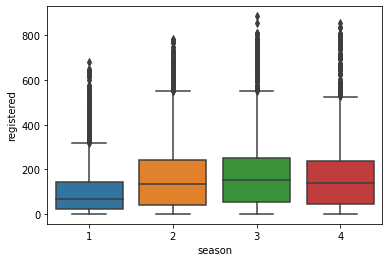

In [287]:
sns.boxplot(x = "season", y = "registered", data = df)

In [247]:
df.groupby(df["datetime"].dt.month).agg({"casual":["count", "sum", "mean"]})

casual                  
          count    sum       mean
datetime                         
1           884   7252   8.203620
2           901   9297  10.318535
3           901  25056  27.809101
4           909  39813  43.798680
5           912  41285  45.268640
6           912  48574  53.260965
7           912  50947  55.862939
8           912  45870  50.296053
9           909  45901  50.496150
10          911  38087  41.807903
11          911  25353  27.829857
12          912  14700  16.118421

<AxesSubplot:xlabel='datetime', ylabel='casual'>

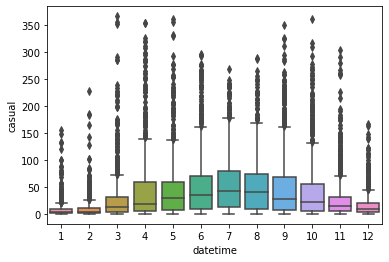

In [283]:
sns.boxplot(x = df["datetime"].dt.month, y = "casual", data = df)

In [251]:
# Casual users are less in the following months - 1, 2, 3, 11, 12

In [246]:
df.groupby(df["datetime"].dt.month).agg({"registered":["count", "sum", "mean"]})

registered                    
              count     sum        mean
datetime                               
1               884   72632   82.162896
2               901   89816   99.684795
3               901  108445  120.360710
4               909  127589  140.361936
5               912  158862  174.190789
6               912  172159  188.770833
7               912  163670  179.462719
8               912  167646  183.822368
9               909  166628  183.309131
10              911  169347  185.891328
11              911  151087  165.847420
12              912  145460  159.495614

<AxesSubplot:xlabel='datetime', ylabel='registered'>

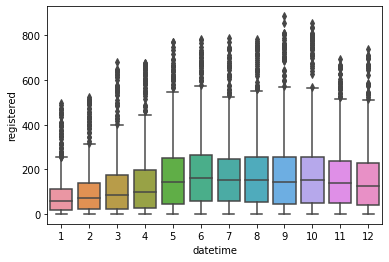

In [284]:
sns.boxplot(x = df["datetime"].dt.month, y = "registered", data = df)

In [252]:
# Registered users are less in the following months - 1, 2, 3

In [248]:
df.groupby(df["datetime"].dt.month).agg({"count":["count", "sum", "mean"]})

count                    
         count     sum        mean
datetime                          
1          884   79884   90.366516
2          901   99113  110.003330
3          901  133501  148.169811
4          909  167402  184.160616
5          912  200147  219.459430
6          912  220733  242.031798
7          912  214617  235.325658
8          912  213516  234.118421
9          909  212529  233.805281
10         911  207434  227.699232
11         911  176440  193.677278
12         912  160160  175.614035

<AxesSubplot:xlabel='registered', ylabel='Density'>

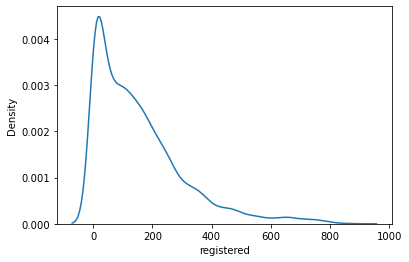

In [275]:
sns.kdeplot(data = df, x="registered")

C:\Users\rajen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

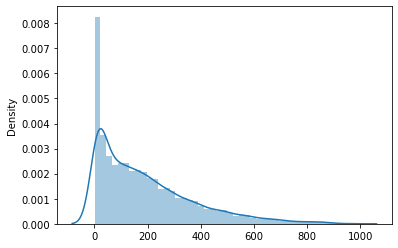

In [277]:
sns.distplot(x = df["count"])

<AxesSubplot:xlabel='season', ylabel='registered'>

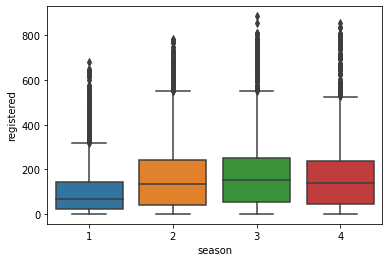

In [286]:
sns.boxplot(x = "season", y = "registered", data = df)

### Bivariate Analysis

<AxesSubplot:>

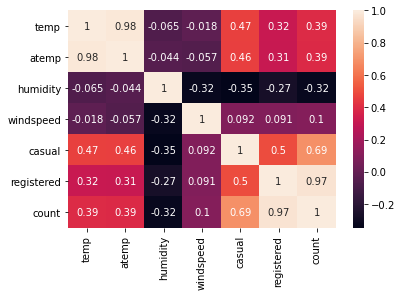

In [298]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='temp', ylabel='registered'>

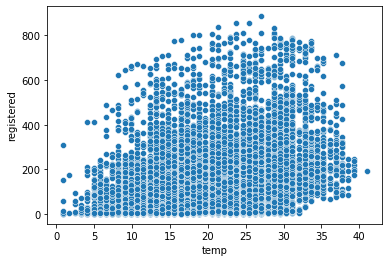

In [304]:
sns.scatterplot(x = "temp", y = "registered", data = df)

<AxesSubplot:xlabel='temp', ylabel='casual'>

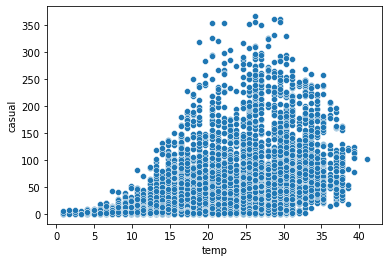

In [305]:
sns.scatterplot(x = "temp", y = "casual", data = df)

<AxesSubplot:xlabel='atemp', ylabel='registered'>

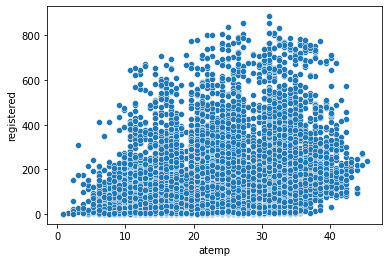

In [369]:
sns.scatterplot(x = "atemp", y = "registered", data = df)

<AxesSubplot:xlabel='atemp', ylabel='casual'>

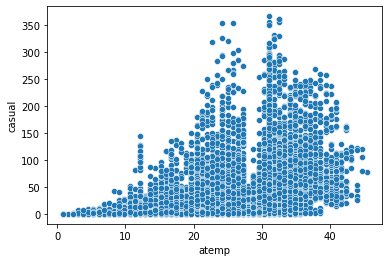

In [370]:
sns.scatterplot(x = "atemp", y = "casual", data = df)

<AxesSubplot:xlabel='temp', ylabel='count'>

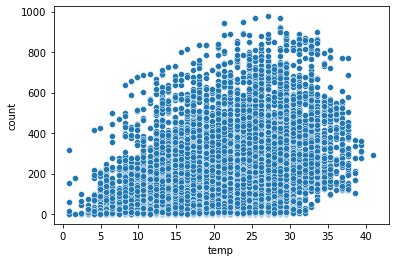

In [367]:
sns.scatterplot(x=df["temp"], y = df["count"])

<AxesSubplot:xlabel='atemp', ylabel='count'>

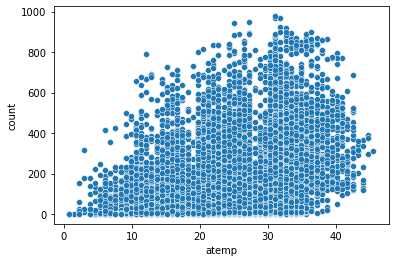

In [368]:
sns.scatterplot(x=df["atemp"], y = df["count"])

In [371]:
# temp & atemp shows that the huggher (sunny or pleasant) the temp, more users will avail the service, that not be right if it's too high though (more than 35) 

<AxesSubplot:xlabel='humidity', ylabel='count'>

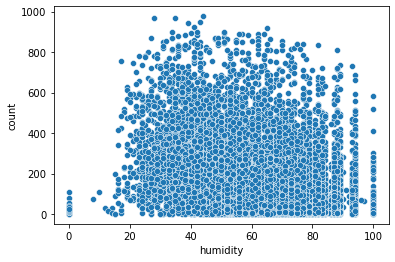

In [374]:
sns.scatterplot(x=df["humidity"], y = df["count"])

<AxesSubplot:xlabel='windspeed', ylabel='count'>

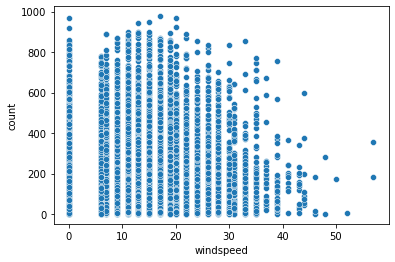

In [375]:
sns.scatterplot(x=df["windspeed"], y = df["count"])

In [373]:
# humidity doesn't seem to have much impact of the number of users
# higher the windspeed, lower is the number of users availing service

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_time


### Multivariate Analysis

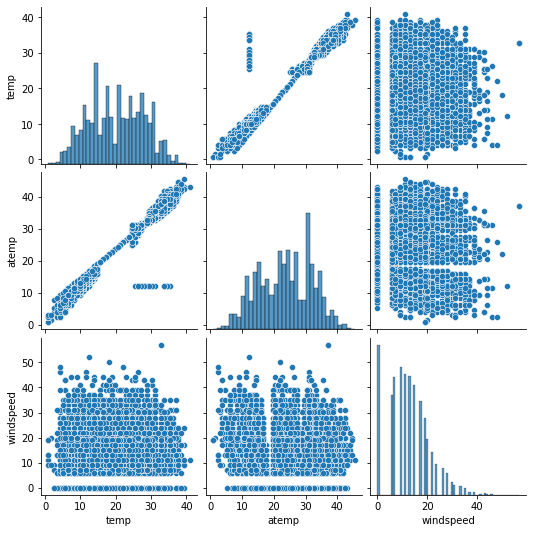

In [307]:
sns.pairplot(df.select_dtypes(include = "float64"))

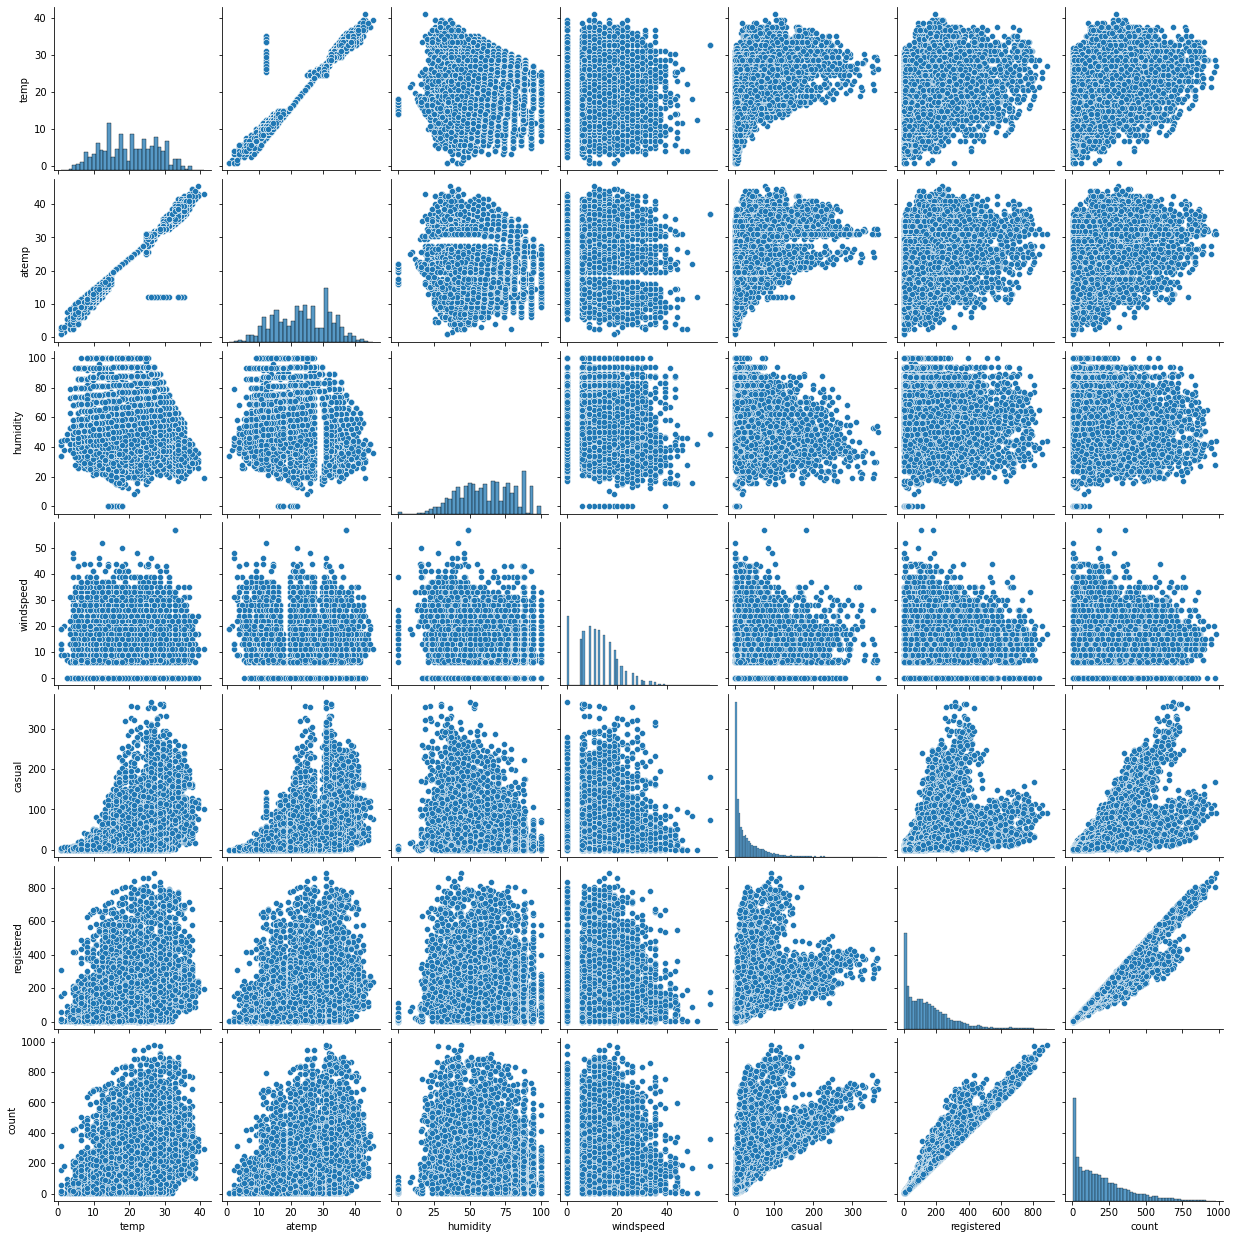

In [291]:
sns.pairplot(df)

# Insights

1. Season and weather has significant impact on the number of users (casual or registered)
2. Time also plays crucial role in the reducing the users, specific time of the day have very few users availing the service
3. Significant difference in the number of casual and registered users availing the service
4. Temp & atemp also has affecting the number of users availing service, sunny the temperature, more people will use it.
5. During holidays and working days, there has been seen huge drop in number of users availing services
6. Windspeed and humidity are external factors. Humidity is not playing any role in the number of users though. Higher the Windspeed, less number of users are availing service

In [372]:
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_time
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,night


# Recommendations

1. Since weather & temperature is affecting the experience of the customer, bikes can be provided with a shed in it or an umbrella to protect themselves during th high temperatures or a rainee weather so they can use it whenever necessary. This will help change the mindset of the user who wants to use the bike but can't due to weather / temp concerns. It will also help during some of the windspeed challenges but not to full extent.
2. Since during night time, people are not preferring bike, it can be further investigated if it's due to safety concerns. If the safety is a concern, emergency features can be added to the bike which will allow customer to connect with the service station, nearby police station or nearby hospital to get necessary help which will encourage customers to use it without worries.
3. During working days, more people are availing the service, and during holidays or weekends, less number of people are availing the service. Location of the bike parking stations needs to further researched, is this because bike parking stations are only available in the locality where there are offices and not available where the local market places are for the easy commute. If that's the case, then more bike parking stations can be offered in the locality where there will be more crowd during weekends. eg. market places, parks, etc.
4. During holidays or weekends, bikes can be offered at a discounted rates to encourage customers to avail service.
5. During holidays or weekends, bike services can be emphasized as the preferred mode of transportation, highlighting the aspects of health, enjoyment, and recreational rides. This approach can attract individuals who are seeking a health-conscious and enjoyable way to travel.